# Solar Radiation and the Ever Changing 

This project will take solar radiation, precipitation, temperature, and evaportation data to monitor how much solar radiation influence seasonality changes in North Orini, Maine. 

@author = Gavin Drake  
@date = 2023-03-30  
@license = MIT -- https://opensource.org/licenses/MIT

Question/Hypothesis: How does solar radiation influence seasonality changes over time?

Site: 30 miles North of Orono, Maine (US-Ho2)
    Elevation: 60m
    Location: Howland Forest, Evergreen Needleleaf Forests
    Climate: Warm Summer Continental 

Data: From AmeriFlux
    Date: 1999-2020
    Name: Daily Project Data.csv
    Location: C:\Users\Gavin\OneDrive\Documents\HDA lecture\Project

Graph: This will be added. My excel kept crashing

In [1]:
# Importing modules

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
#Specifying parameters: Such as date, in file names, etc
infile_name = 'Daily Project Data.csv'

fig_title = 'North Orono, ME'


In [3]:
#Loading Data: using the methods from Lab 6 to load data
    
#loading data and removing -9999 values
def readscan(filename):
   data = pd.read_csv(infile_name, comment = '#', parse_dates = ['TIMESTAMP'],
                      index_col = ['TIMESTAMP'], na_values = ('-9999'))
   data = data.resample('D').mean()
   data = data.rename(columns={'P_F': 'Precip', 'TA_F': 'Air_Temp'})
   data.replace([np.nan], 0, inplace = True)
   return data

data = readscan(infile_name)


In [4]:
#For Loop

columns= ['G', 'H', 'LE', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'TA', 'TS', 'Precip', 'NETRAD', 'Air_Temp']
for c in columns:
     if c in data.columns.tolist():
         pass
     else:
         data[c]=data.filter(like=c+'_', axis=1).mean(axis=1)
data = data[columns]


In [5]:
#Calculations

# Rolling Command

data['7_day_AT'] = data['Air_Temp'].rolling(7, center = False).mean()

data['7_day_Rad'] = data['NETRAD'].rolling(7, center = False).mean()

startdate=data.loc[(data.index.month==10)&(data.index.day==1)].index[0]
enddate=data.loc[(data.index.month==9)&(data.index.day==30)].index[-1]
data=data[startdate:enddate]


creates a new column in the data file that looks averages the data from a 7 day period into one variable throughout a water year. This then continues for every water year in the data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


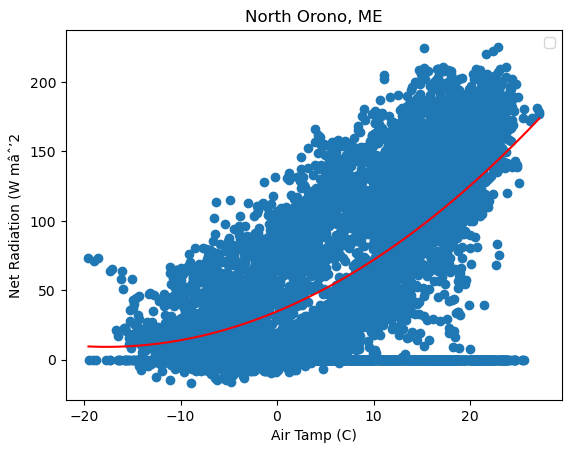

In [6]:
#Plot 1 

# Plot scatter plot
fig, ax = plt.subplots()
ax.scatter(data['7_day_AT'],data['7_day_Rad'])
x=data['7_day_AT']
y=data['7_day_Rad']
coefficients = np.polyfit(x, y, 2)

# Plotting the best-fit line
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = coefficients[0]*(x_fit)**2+ coefficients[1] * x_fit + coefficients[2]
plt.plot(x_fit, y_fit, color='red')

# Add x-axis label
ax.set_xlabel('Air Tamp (C)')

# Add y-axis label
ax.set_ylabel('Net Radiation (W mâˆ’2')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()


In [7]:
#Monthly Seasonality Calc.


# Add columns (month, water_year,day_of_year)
data['month']=data.index.month
data['water_year']=data.index.year
data.loc[data['month']>9,'water_year']= data.loc[data['month']>9,'water_year'] +1
data['day_of_year']=data.index.dayofyear

# Annual data series
data_annual = data.groupby('water_year')['Precip'].sum()

# Calculations
P = np.mean(data_annual) #avg annual total precip (mm/year)

# Average monthly precipitation
P_month = P/12

# New dataframe for monthly data
data_monthly = data.groupby('month')[['day_of_year']].median()

# Creating new precip column in new dataframe
data_monthly['Precip'] = np.NAN

for i in range(1,13):
    pmonth = data.loc[data['month']==i,['Precip', 'water_year']]
    monthmean = pmonth.groupby('water_year').sum().mean()
    data_monthly.loc[i,'Precip'] = monthmean[0]
    

C:\Users\Gavin\AppData\Local\Temp\ipykernel_6876\2486163739.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


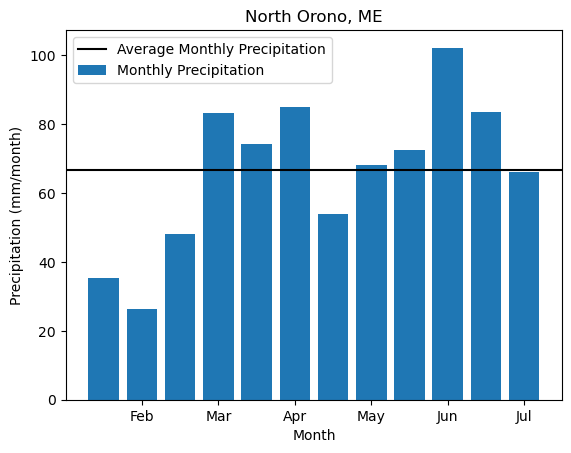

In [8]:
#Bar Chart

fig, ax = plt.subplots()

# Plot monthly precipitation
ax.bar(data_monthly.index, data_monthly['Precip'], label='Monthly Precipitation')

# Plot average monthly precipitation
ax.axhline(P_month, ls='-', color='k', label='Average Monthly Precipitation')

# Add x-axis label
ax.set_xlabel('Month')

# Add y-axis label
ax.set_ylabel('Precipitation (mm/month)')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()

# Change x-axis tick labels to month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


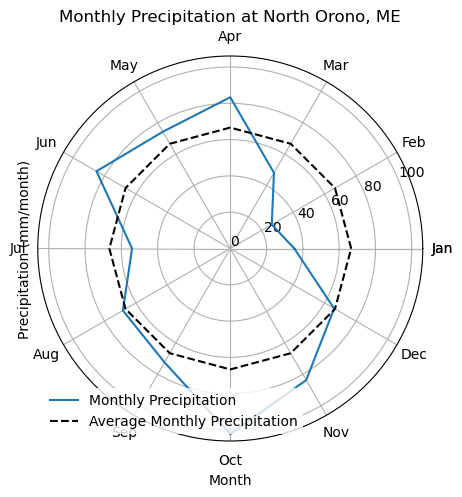

In [9]:
#Create Polar Plot

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

# Plot monthly precipitation
theta = np.linspace(0, 2*np.pi, 13)
r = data_monthly['Precip'].tolist()
r.append(r[0])
ax.plot(theta, r)

# Add circular line for average monthly precipitation
avg_precip = np.ones(13) * data_monthly['Precip'].mean()
ax.plot(theta, avg_precip, color='k', linestyle='--')

# Set x-axis (theta) labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
ax.set_xticks(theta)
ax.set_xticklabels(month_names)

# Set radial axis (r) ticks
ax.set_yticks(np.arange(0, 110, 20))

# Add labels, legend, and title
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm/month)')
ax.set_title('Monthly Precipitation at North Orono, ME')
legend = ax.legend(['Monthly Precipitation', 'Average Monthly Precipitation'], loc='lower left')
legend.get_frame().set_linewidth(0)

# Display plot
plt.show()


ValueError: too many values to unpack (expected 7)

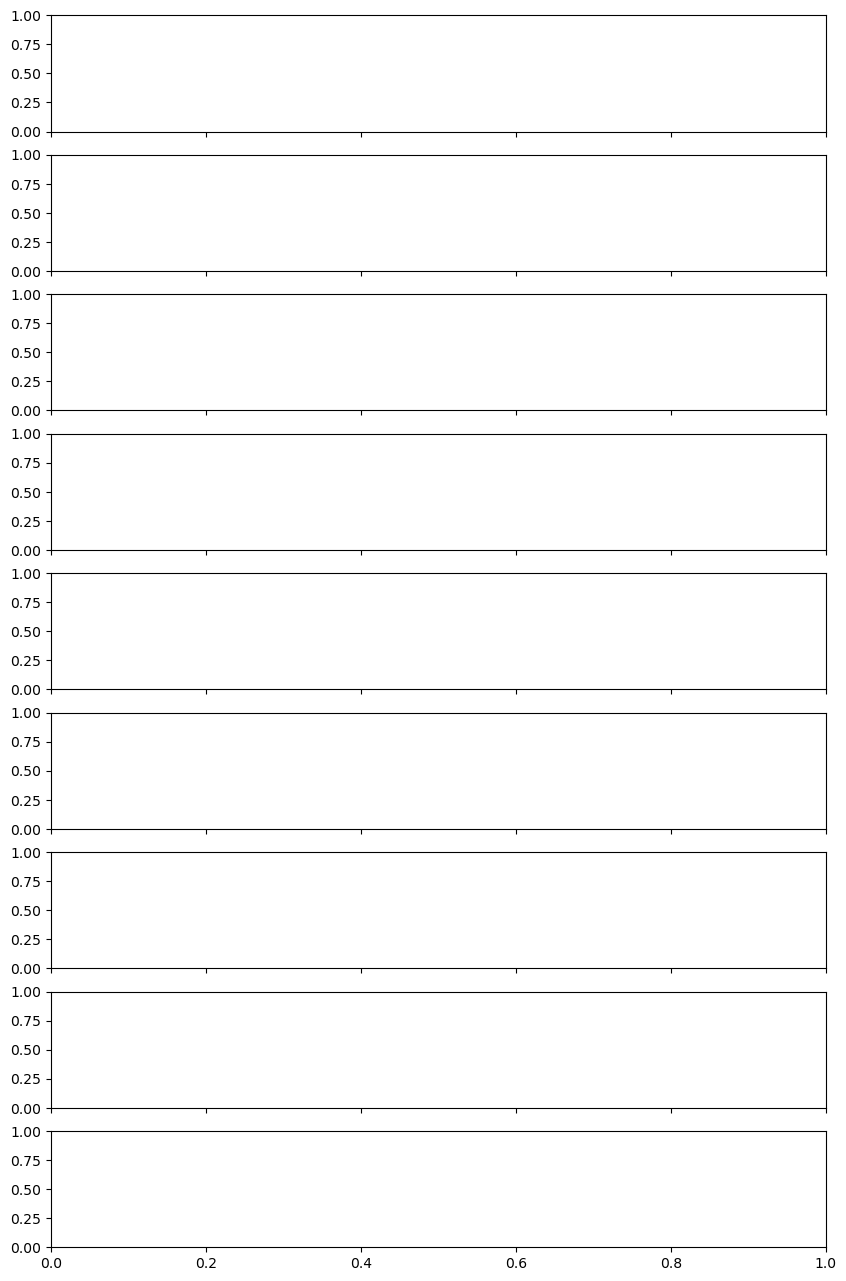

In [13]:
#Plotting Shorter Time Series # Need to expand on this

# creating a for loop to go through different dates
#for i,v in enumerate(startdate):
    #data = data[startdate:enddate]

# Creating plots
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(9,1, 
                                            figsize = (10,16), sharex = True)
    
ax1.plot(data['SW_IN'], 'b-', label = 'SW_IN')
ax1.plot(data['SW_OUT'], 'r-', label = 'SW_OT')
ax1.plot(data['LW_IN'], 'g-', label = 'LW_IN')
ax1.plot(data['LW_OUT'],'c-', label = 'LW_OUT')
ax1.plot(data['LE'], 'k-', label = 'LE')
ax1.plot(data['H'],'m-', label = 'H') 
ax1.plot(data['G'], 'y-', label = 'G')
ax1.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

# Add plot components (ax1 - 9)
ax1.set_ylabel('Energy flix in \n watts/m2')
ax1.set_title(fig_title)

ax2.plot(data['PA'],'b-', label = 'PA')
ax2.set_ylabel('Atmospheric Pressure \n kPa')
ax2.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax3.plot(data['TA'], 'b-', label = 'TA')
ax3.plot(data['TS'], 'r-', label = 'TS')
ax3.set_ylabel('Temperature in \n degrees C')
ax3.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax4.plot(data['WS'],'b-', label = 'WS')
ax4.set_ylabel('Wind Speed in \n m/s')
ax4.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax5.plot(data['SWC'],'b-', label = 'SWC')
ax5.set_ylabel('Soil Moisture \n %')
ax5.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax6.plot(data['Precip'],'b-', label = 'P')
ax6.set_ylabel('Precipitation \n mm')
ax6.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax7.plot(data['ET_filled'], 'r-', label = 'ET estimate')
ax7.set_ylabel('Evapotranspiration \n mm/day')
ax7.set_title(fig_title)
ax7.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))


Conclusion: from this code I will gain experience in using methods from lectures and past labs and generate 4 plots using statistical analysis methods from lecture. Glodal climate change is a major issue however, solar radiation does play a part to seasonal changes. Monitering seasonality change can show how much varying solar radiation affects the climate. 